In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xgi
import networkx as nx
from governance import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cProfile
import math

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
num_decisions = 6
num_people = 1000

select_decision_type = "random"
select_group_type = "star"
make_decision_type = "average"
update_opinions_type = "star"

In [4]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 0
satisfaction_0 = np.zeros((len(densities),num_samples))
satisfiability_0 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        #opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_0[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_0[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_0[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [5]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 1
satisfaction_1 = np.zeros((len(densities),num_samples))
satisfiability_1 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        #opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_1[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_1[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_1[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [6]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 2
satisfaction_2 = np.zeros((len(densities),num_samples))
satisfiability_2 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        #opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_2[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_2[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_2[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [7]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 5
satisfaction_5 = np.zeros((len(densities),num_samples))
satisfiability_5 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        #opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_5[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_5[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_5[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [8]:
num_decisions = 20
num_samples = 1000
densities = np.arange(0.0, 0.2, 0.02)

group_size = 20
overlap = 10
satisfaction_10 = np.zeros((len(densities),num_samples))
satisfiability_10 = np.zeros((len(densities),num_samples))

for i in range(len(densities)):
    print(i / len(densities))
    for j in range(num_samples):
        decision_matrix = np.zeros((num_decisions,num_decisions))
        num_constraints = 0
        for d1 in range(num_decisions):
            for d2 in range(d1+1,num_decisions):
                if random.uniform(0, 1)<densities[i]:
                    num_constraints += 1
                    if random.uniform(0, 1)<0.5:
                        decision_matrix[d1,d2] = 1
                        decision_matrix[d2,d1] = 1
                    else:
                        decision_matrix[d1,d2] = -1
                        decision_matrix[d2,d1] = -1
        #opinions = create_greedy_opinions(num_people, num_decisions, decision_matrix)
        opinions = create_uniform_greedy_opinions(num_people, num_decisions, decision_matrix)
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        d = decisions_to_array(decisions)
        satisfaction_10[i,j] += (votes.dot(d)/np.sum(np.abs(votes)))
        if num_constraints > 0:
            for d1, d2 in np.ndindex(decision_matrix.shape):
                satisfiability_10[i,j] += (
                    decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / (2*num_constraints)
                )
        else:
            satisfiability_10[i,j] += 1.0

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


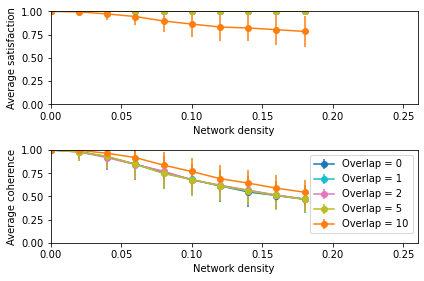

In [9]:
plt.figure()
plt.subplot(212)
plt.errorbar(densities, satisfiability_0.mean(axis=1), yerr=satisfiability_0.std(axis=1), color="tab:blue", marker="o",label='Overlap = 0')
plt.errorbar(densities, satisfiability_1.mean(axis=1), yerr=satisfiability_1.std(axis=1), color="tab:cyan", marker="o",label='Overlap = 1')
plt.errorbar(densities, satisfiability_2.mean(axis=1), yerr=satisfiability_2.std(axis=1), color="tab:pink", marker="o",label='Overlap = 2')
plt.errorbar(densities, satisfiability_5.mean(axis=1), yerr=satisfiability_5.std(axis=1), color="tab:olive", marker="o",label='Overlap = 5')
plt.errorbar(densities, satisfiability_10.mean(axis=1), yerr=satisfiability_10.std(axis=1), color="tab:orange", marker="o",label='Overlap = 10')
plt.ylabel("Average coherence")
plt.xlabel("Network density")
plt.ylim((0,1))
plt.xlim((0,0.26))
plt.legend()
plt.subplot(211)
plt.errorbar(densities, satisfaction_0.mean(axis=1), yerr=satisfaction_0.std(axis=1), color="tab:blue", marker="o")
plt.errorbar(densities, satisfaction_1.mean(axis=1), yerr=satisfaction_1.std(axis=1), color="tab:cyan", marker="o")
plt.errorbar(densities, satisfaction_2.mean(axis=1), yerr=satisfaction_2.std(axis=1), color="tab:pink", marker="o")
plt.errorbar(densities, satisfaction_5.mean(axis=1), yerr=satisfaction_5.std(axis=1), color="tab:olive", marker="o")
plt.errorbar(densities, satisfaction_10.mean(axis=1), yerr=satisfaction_10.std(axis=1), color="tab:orange", marker="o")
plt.ylabel("Average satisfaction")
plt.xlabel("Network density")
plt.ylim((0,1))
plt.xlim((0,0.26))
plt.tight_layout()
plt.savefig("Figures/random_networks_uniform_greedy.png", dpi=1000)
plt.savefig("Figures/random_networks_uniform_greedy.pdf")
plt.show()
np.savetxt("Simulations/random_network_uniform_greedy_densities.csv", densities, delimiter=",")
np.savetxt("Simulations/random_network_uniform_greedy_overlap0.csv", satisfaction_0, delimiter=",")
np.savetxt("Simulations/random_network_uniform_greedy_overlap1.csv", satisfaction_1, delimiter=",")
np.savetxt("Simulations/random_network_uniform_greedy_overlap2.csv", satisfaction_2, delimiter=",")
np.savetxt("Simulations/random_network_uniform_greedy_overlap5.csv", satisfaction_5, delimiter=",")
np.savetxt("Simulations/random_network_uniform_greedy_overlap10.csv", satisfaction_10, delimiter=",")

## 